In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("pokemon_cleaned.csv")
df.head()

,name,abilities,attack,base_egg_steps,base_happiness,base_total,capture_rate,classification,defense,experience_growth,...,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,genderless
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",49,5120,70,318,45,Seed Pokémon,49,1059860,...,88.1,65,65,45,grass,poison,6.9,1,0,0
1,Ivysaur,"['Overgrow', 'Chlorophyll']",62,5120,70,405,45,Seed Pokémon,63,1059860,...,88.1,80,80,60,grass,poison,13.0,1,0,0
2,Venusaur,"['Overgrow', 'Chlorophyll']",100,5120,70,625,45,Seed Pokémon,123,1059860,...,88.1,122,120,80,grass,poison,100.0,1,0,0
3,Charmander,"['Blaze', 'Solar Power']",52,5120,70,309,45,Lizard Pokémon,43,1059860,...,88.1,60,50,65,fire,NaN,8.5,1,0,0
4,Charmeleon,"['Blaze', 'Solar Power']",64,5120,70,405,45,Flame Pokémon,58,1059860,...,88.1,80,65,80,fire,NaN,19.0,1,0,0


In [3]:
df.head().T

,0,1,2,3,4
name,Bulbasaur,Ivysaur,Venusaur,Charmander,Charmeleon
abilities,"['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Blaze', 'Solar Power']","['Blaze', 'Solar Power']"
attack,49,62,100,52,64
base_egg_steps,5120,5120,5120,5120,5120
base_happiness,70,70,70,70,70
base_total,318,405,625,309,405
capture_rate,45,45,45,45,45
classification,Seed Pokémon,Seed Pokémon,Seed Pokémon,Lizard Pokémon,Flame Pokémon
defense,49,63,123,43,58
experience_growth,1059860,1059860,1059860,1059860,1059860


In [4]:
# TODO: rename title --> Pkmn introduced per generation

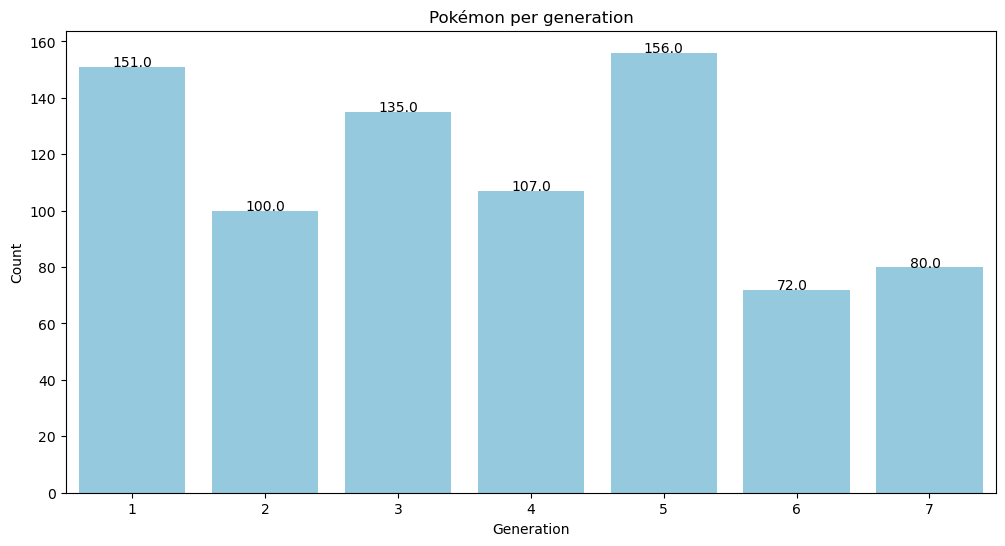

In [5]:
# Examine the count of Pkmn per generation.

plt.figure(figsize = (12, 6))

ax = sns.countplot(x = "generation",
                  data = df,
                  color = "skyblue")

ax.set_title("Pokémon per generation")
ax.set(xlabel = "Generation", ylabel = "Count")

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),
               (p.get_x() + 0.25,
               p.get_height() + 0.05))
plt.show()

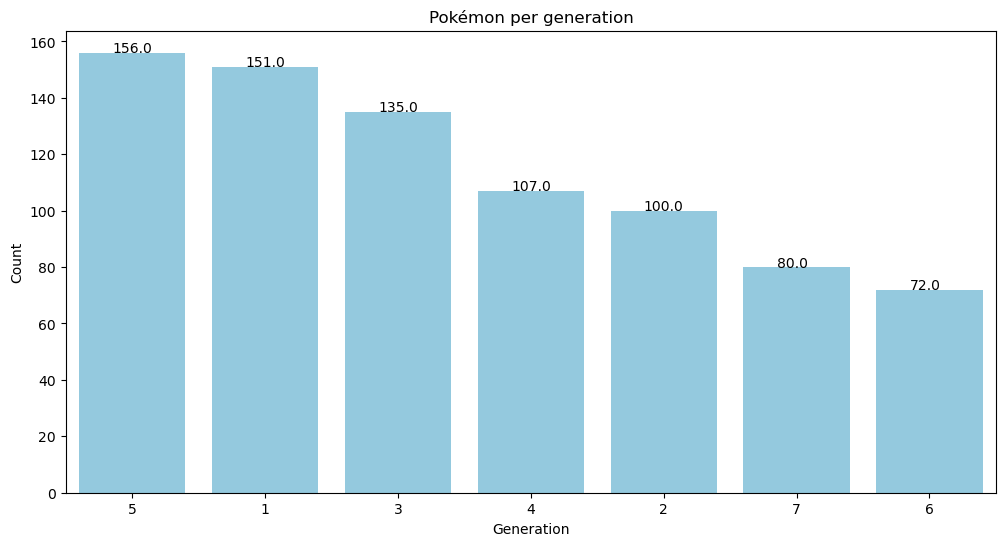

In [6]:
# Order the output.

plt.figure(figsize = (12, 6))

ax = sns.countplot(x = "generation",
                  data = df,
                  order = df["generation"].value_counts().index,
                  color = "skyblue")

ax.set_title("Pokémon per generation")
ax.set(xlabel = "Generation", ylabel = "Count")

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),
               (p.get_x() + 0.25,
               p.get_height() + 0.05))
plt.show()

In [7]:
# From this we draw that Generation 5 introduced the most and Generation 6 the least new Pkmn.

In [8]:
# TODO: Count legendary sum, count legendary in each generation, count all pkmn und non-legendary pkmn.

In [9]:
# TODO: types etc.

In [10]:
# Legendary Pkmn:

legendary_pkmn = df["is_legendary"].sum()
legendary_pkmn

70

In [11]:
# Non-legendary Pkmn

pkmn = df.count().iloc[0] # Count all Pkmn in dataset first

non_legendary_pkmn = pkmn - legendary_pkmn
non_legendary_pkmn

731

In [12]:
pkmn

801

In [13]:
# Alternative version:

legendary = df[df["is_legendary"] == 1][["name", "type1", "type2"]]
legendary

,name,type1,type2
143,Articuno,ice,flying
144,Zapdos,electric,flying
145,Moltres,fire,flying
149,Mewtwo,psychic,NaN
150,Mew,psychic,NaN
...,...,...,...
796,Celesteela,steel,flying
797,Kartana,grass,steel
798,Guzzlord,dark,dragon
799,Necrozma,psychic,NaN


In [14]:
df.head().T

,0,1,2,3,4
name,Bulbasaur,Ivysaur,Venusaur,Charmander,Charmeleon
abilities,"['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Blaze', 'Solar Power']","['Blaze', 'Solar Power']"
attack,49,62,100,52,64
base_egg_steps,5120,5120,5120,5120,5120
base_happiness,70,70,70,70,70
base_total,318,405,625,309,405
capture_rate,45,45,45,45,45
classification,Seed Pokémon,Seed Pokémon,Seed Pokémon,Lizard Pokémon,Flame Pokémon
defense,49,63,123,43,58
experience_growth,1059860,1059860,1059860,1059860,1059860


In [15]:
df["type2"].fillna("None", inplace = True)

C:\Users\seitz\AppData\Local\Temp\ipykernel_6620\314930012.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["type2"].fillna("None", inplace = True)


In [16]:
df.head()

,name,abilities,attack,base_egg_steps,base_happiness,base_total,capture_rate,classification,defense,experience_growth,...,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,genderless
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",49,5120,70,318,45,Seed Pokémon,49,1059860,...,88.1,65,65,45,grass,poison,6.9,1,0,0
1,Ivysaur,"['Overgrow', 'Chlorophyll']",62,5120,70,405,45,Seed Pokémon,63,1059860,...,88.1,80,80,60,grass,poison,13.0,1,0,0
2,Venusaur,"['Overgrow', 'Chlorophyll']",100,5120,70,625,45,Seed Pokémon,123,1059860,...,88.1,122,120,80,grass,poison,100.0,1,0,0
3,Charmander,"['Blaze', 'Solar Power']",52,5120,70,309,45,Lizard Pokémon,43,1059860,...,88.1,60,50,65,fire,None,8.5,1,0,0
4,Charmeleon,"['Blaze', 'Solar Power']",64,5120,70,405,45,Flame Pokémon,58,1059860,...,88.1,80,65,80,fire,None,19.0,1,0,0


In [17]:
df.tail()

,name,abilities,attack,base_egg_steps,base_happiness,base_total,capture_rate,classification,defense,experience_growth,...,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,genderless
796,Celesteela,['Beast Boost'],101,30720,0,570,25,Launch Pokémon,103,1250000,...,NaN,107,101,61,steel,flying,999.9,7,1,1
797,Kartana,['Beast Boost'],181,30720,0,570,255,Drawn Sword Pokémon,131,1250000,...,NaN,59,31,109,grass,steel,0.1,7,1,1
798,Guzzlord,['Beast Boost'],101,30720,0,570,15,Junkivore Pokémon,53,1250000,...,NaN,97,53,43,dark,dragon,888.0,7,1,1
799,Necrozma,['Prism Armor'],107,30720,0,600,3,Prism Pokémon,101,1250000,...,NaN,127,89,79,psychic,None,230.0,7,1,1
800,Magearna,['Soul-Heart'],95,30720,0,600,3,Artificial Pokémon,115,1250000,...,NaN,130,115,65,steel,fairy,80.5,7,1,1


In [18]:
df["percentage_male"].fillna("None", inplace = True)

C:\Users\seitz\AppData\Local\Temp\ipykernel_6620\175734352.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["percentage_male"].fillna("None", inplace = True)
C:\Users\seitz\AppData\Local\Temp\ipykernel_6620\175734352.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df["percentage_male"].fillna("None", inplace = True)


In [19]:
confirm_list = ["Mew", "Golem"]
df[df["name"].isin(confirm_list)].T

,75,150
name,Golem,Mew
abilities,"['Rock Head', 'Sturdy', 'Sand Veil', 'Magnet P...",['Synchronize']
attack,120,100
base_egg_steps,3840,30720
base_happiness,70,100
base_total,495,600
capture_rate,45,45
classification,Megaton Pokémon,New Species Pokémon
defense,130,100
experience_growth,1059860,1059860


In [20]:
legendary

,name,type1,type2
143,Articuno,ice,flying
144,Zapdos,electric,flying
145,Moltres,fire,flying
149,Mewtwo,psychic,NaN
150,Mew,psychic,NaN
...,...,...,...
796,Celesteela,steel,flying
797,Kartana,grass,steel
798,Guzzlord,dark,dragon
799,Necrozma,psychic,NaN


In [21]:
legend = df[df["is_legendary"] == 1][["name", "type1", "type2"]]
legend

,name,type1,type2
143,Articuno,ice,flying
144,Zapdos,electric,flying
145,Moltres,fire,flying
149,Mewtwo,psychic,None
150,Mew,psychic,None
...,...,...,...
796,Celesteela,steel,flying
797,Kartana,grass,steel
798,Guzzlord,dark,dragon
799,Necrozma,psychic,None


In [22]:
# Stats Analysis

In [23]:
df_legendary = df[df["is_legendary"] == 1] # Creates a df consisting of legendary Pkmn

df_non_legendary = df[df["is_legendary"] == 0] # Creates a df consisting of non-legendary Pkmn

In [24]:
print(f"Average base_total of legendary Pokémon: {df_legendary['base_total'].mean()}") # Prints the avg base_total stats
print(f"Average base_total of non-legendary Pokémon: {df_non_legendary['base_total'].mean()}") # Prints the avg base_total stats

Average base_total of legendary Pokémon: 615.2571428571429
Average base_total of non-legendary Pokémon: 410.4815321477428


In [25]:
# We might draw that stats of legendary Pkmn are higher than non-legendary Pkmn based on the avg base_total.
# Let's keep this in mind. It may be of help for our prediction model later.

In [26]:
# Capture Rate Analysis

overall_capture_corr = df["capture_rate"].corr(df["is_legendary"])
print(f"Overall correlation: {overall_capture_corr}")

Overall correlation: -0.3276772302416779


In [27]:
# Avg capture rate

avg_cap_rate_legendary = df_legendary["capture_rate"].mean()
avg_cap_rate_non_legendary = df_non_legendary["capture_rate"].mean()

print(f"Average capture rate for legendary Pokémon: {avg_cap_rate_legendary}")
print(f"Average capture rate for non_legendary Pokémon: {avg_cap_rate_non_legendary}")

Average capture rate for legendary Pokémon: 17.985714285714284
Average capture rate for non_legendary Pokémon: 106.40218878248974


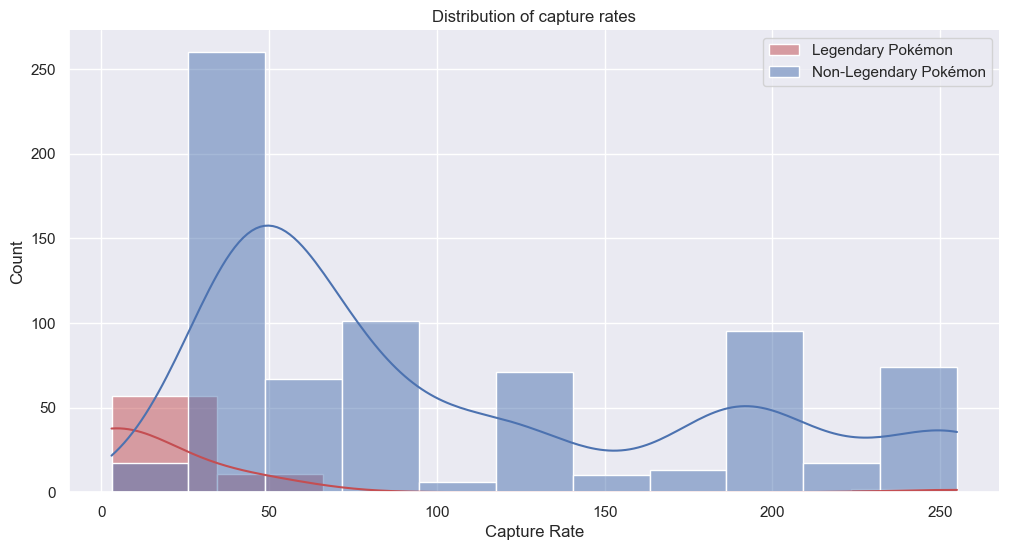

In [28]:
sns.set(rc = {"figure.figsize": (12, 6)})

sns.histplot(data = df_legendary,
            x = "capture_rate",
            kde = True, # TODO: research kde
            label = "Legendary Pokémon",
            color = "r")

sns.histplot(data = df_non_legendary,
            x = "capture_rate",
            kde = True, # TODO: research kde
            label = "Non-Legendary Pokémon",
            color = "b")

plt.legend()
plt.title("Distribution of capture rates")
plt.xlabel("Capture Rate")
plt.ylabel("Count")

#plt.show()
sns.despine()

In [29]:
# Overall, there's a negative correlation between the capture_rate and is_legendary. With some background knowledge we can
# say that legendaries usually more difficult to catch than non-legendaries.
# It is also worth examining the avg cap rates for both legendaries and non-legendaries to get a glimpse of how the catch rates
# differing.

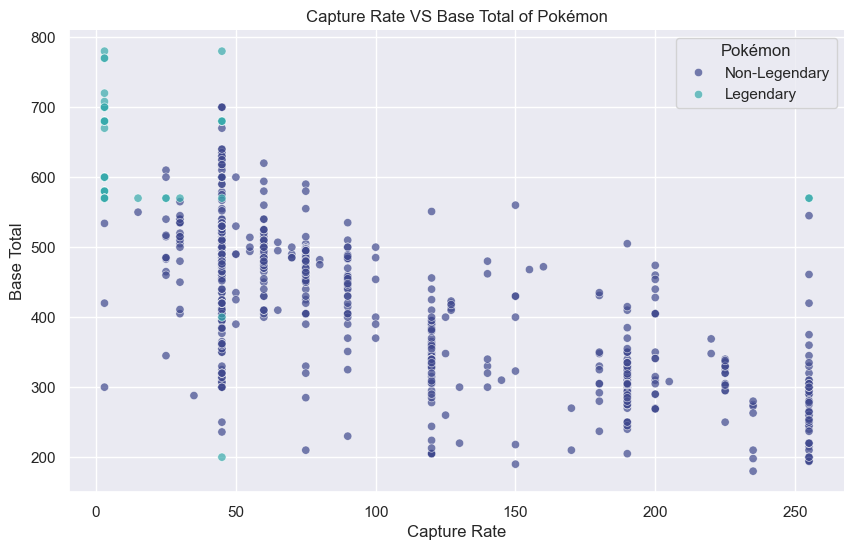

In [30]:
sns.set(rc = {"figure.figsize": (10, 6)})

scatter = sns.scatterplot(data = df,
                           x = "capture_rate",
                           y = "base_total",
                           hue = "is_legendary", # this argument is responsible for the distinction whether a pkmn is a lgnd or not.
                           palette = "mako",
                           alpha = 0.7)

# plt.legend(title = "Pokémon distinction", labels = ["Legendary", "Non-legendary"], palette = "mako")
scatter.set_title("Capture Rate VS Base Total of Pokémon")
scatter.set_xlabel("Capture Rate")
scatter.set_ylabel("Base Total")

# Custom legend settings
legend_labels = {"0": "Non-Legendary", "1" : "Legendary"}
handles, labels = scatter.get_legend_handles_labels()
labels = [legend_labels[label] for label in labels]
scatter.legend(handles = handles, labels = labels, title = "Pokémon")

sns.despine()

In [31]:
# Investigation of genders.

# .shape[0] returns the number of rows in the filtered df, which represents the number of genderless lgnd Pkmn --> see Doc.
# for a detailed explanation.
lgnd_pkmn_genderless_percentage = (df_legendary[df_legendary["percentage_male"] == "None"].shape[0] /
                                  df_legendary.shape[0]) * 100
non_lgnd_pkmn_genderless_percentage = (df_non_legendary[df_non_legendary["percentage_male"] == "None"].shape[0] /
                                  df_non_legendary.shape[0]) * 100

print(f"Percentage of genderless legendary Pokémon: {np.round(lgnd_pkmn_genderless_percentage, 1)}%")
print(f"Percentage of genderless non-legendary Pokémon: {np.round(non_lgnd_pkmn_genderless_percentage, 1)}%")

Percentage of genderless legendary Pokémon: 90.0%
Percentage of genderless non-legendary Pokémon: 4.8%


In [32]:
# Now, it can definitely stated that most of the legendary Pokémon don't have a gender. This could be a good feature for
# predicting later.

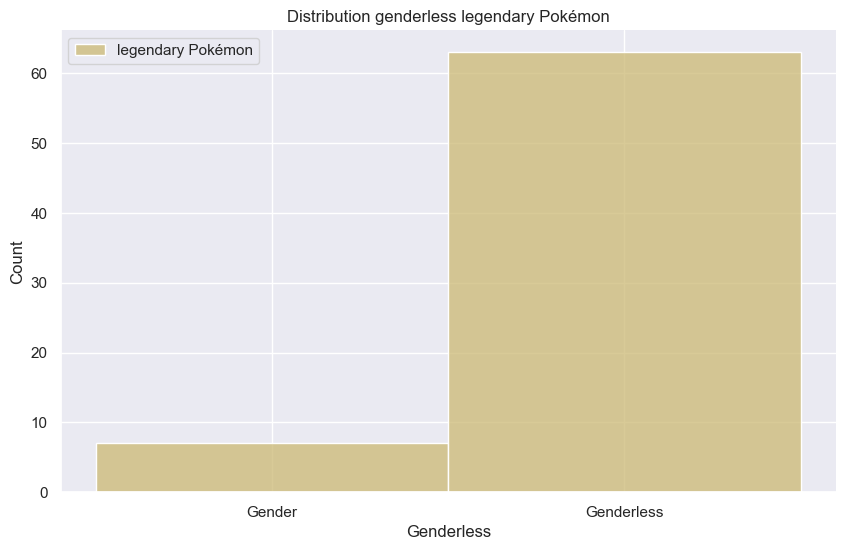

In [33]:
# Histogram of genderless lgnd pkmn
sns.set(rc = {"figure.figsize": (10, 6)})

sns.histplot(data = df[df["is_legendary"] == 1]["percentage_male"] == "None", 
             bins = 2,
             label = "legendary Pokémon",
             color = "y")

plt.legend()
plt.title("Distribution genderless legendary Pokémon")
plt.xlabel("Genderless")
plt.ylabel("Count")
plt.xticks([0.25, 0.75], ["Gender", "Genderless"]) # see Doc. for detailed explanation

sns.despine()

In [34]:
# TODO:
# Overall type examination
# Type distribution lgnd --> type1, type2

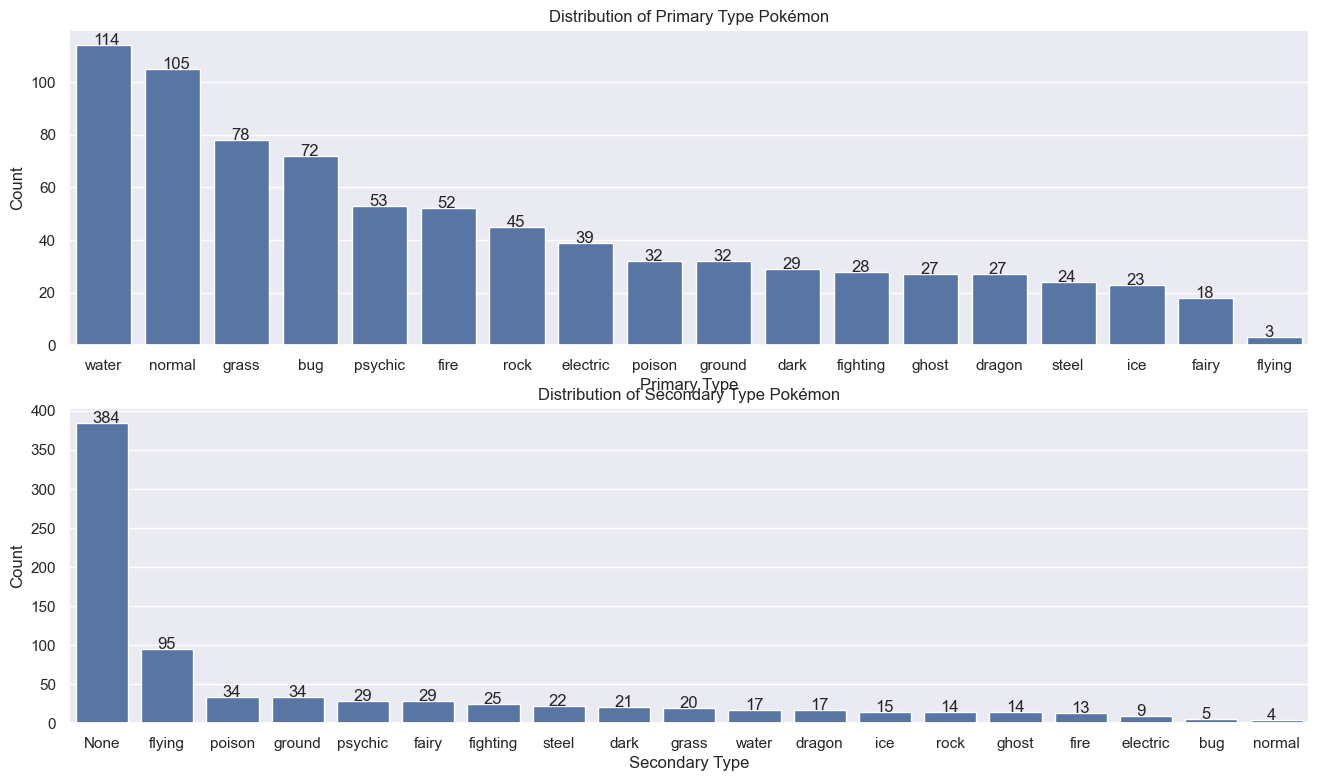

In [35]:
# Distribution of types:

fig, axes = plt.subplots(2, 1, figsize = (16, 9))

distro_type = sns.countplot(x = "type1",
                           data = df,
                           order = df["type1"].value_counts().index,
                           ax = axes[0])

axes[0].set_title('Distribution of Primary Type Pokémon')
axes[0].set_xlabel('Primary Type')
axes[0].set_ylabel('Count')

for p in distro_type.patches:
    distro_type.annotate("{:.0f}".format(p.get_height()),
               (p.get_x() + 0.25,
               p.get_height() + 0.05))
    
distro_type = sns.countplot(x = "type2",
                           data = df,
                           order = df["type2"].value_counts().index,
                           ax = axes[1])

axes[1].set_title('Distribution of Secondary Type Pokémon')
axes[1].set_xlabel('Secondary Type')
axes[1].set_ylabel('Count')

for p in distro_type.patches:
    distro_type.annotate("{:.0f}".format(p.get_height()),
               (p.get_x() + 0.25,
               p.get_height() + 0.05))

plt.show()

In [36]:
# Turns out that water is the most primary type, whereas flying is the most secondary type. A lot of Pokémon don't have any
# second type.
# The least first type is flying.

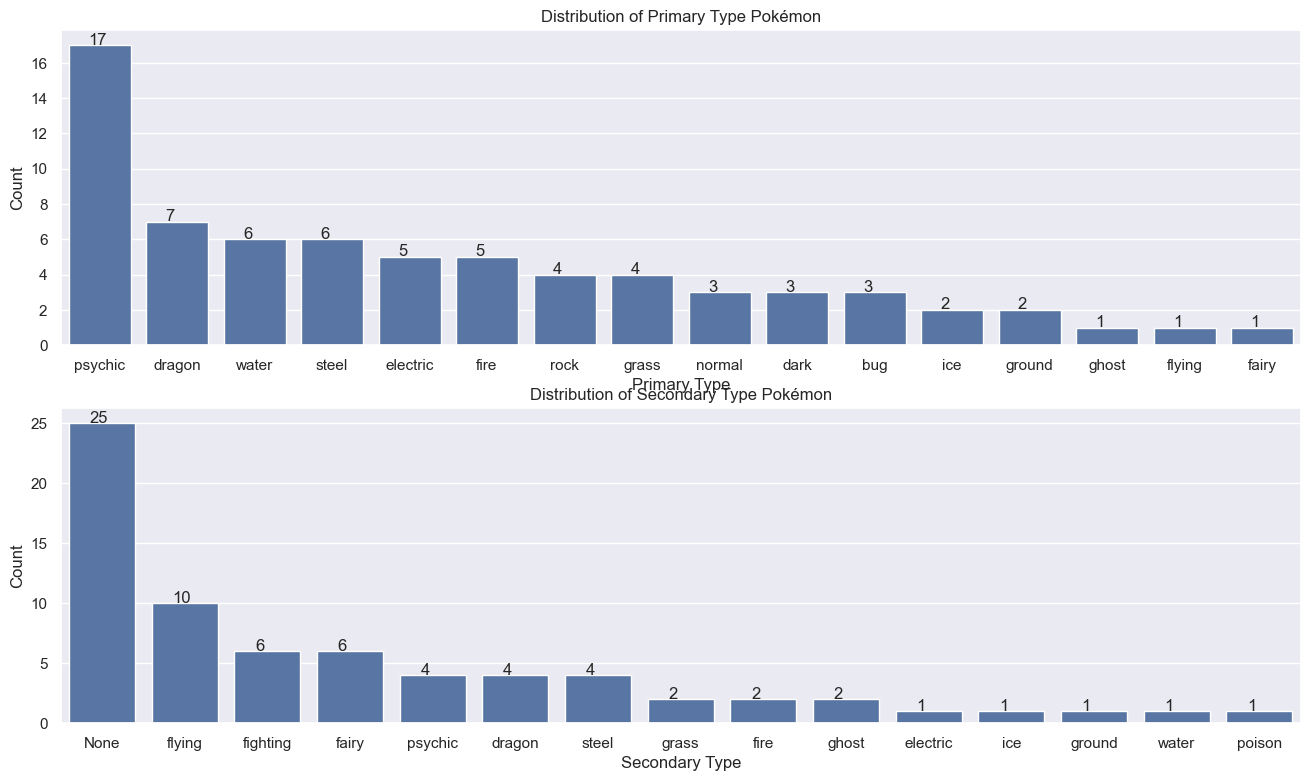

In [37]:
# Distribution of types of lgnd pkmn:

fig, axes = plt.subplots(2, 1, figsize = (16, 9))

distro_type = sns.countplot(x = "type1",
                           data = df_legendary,
                           order = df_legendary["type1"].value_counts().index,
                           ax = axes[0])

axes[0].set_title('Distribution of Primary Type Pokémon')
axes[0].set_xlabel('Primary Type')
axes[0].set_ylabel('Count')

for p in distro_type.patches:
    distro_type.annotate("{:.0f}".format(p.get_height()),
               (p.get_x() + 0.25,
               p.get_height() + 0.05))
    
distro_type = sns.countplot(x = "type2",
                           data = df_legendary,
                           order = df_legendary["type2"].value_counts().index,
                           ax = axes[1])

axes[1].set_title('Distribution of Secondary Type Pokémon')
axes[1].set_xlabel('Secondary Type')
axes[1].set_ylabel('Count')

for p in distro_type.patches:
    distro_type.annotate("{:.0f}".format(p.get_height()),
               (p.get_x() + 0.25,
               p.get_height() + 0.05))

plt.show()

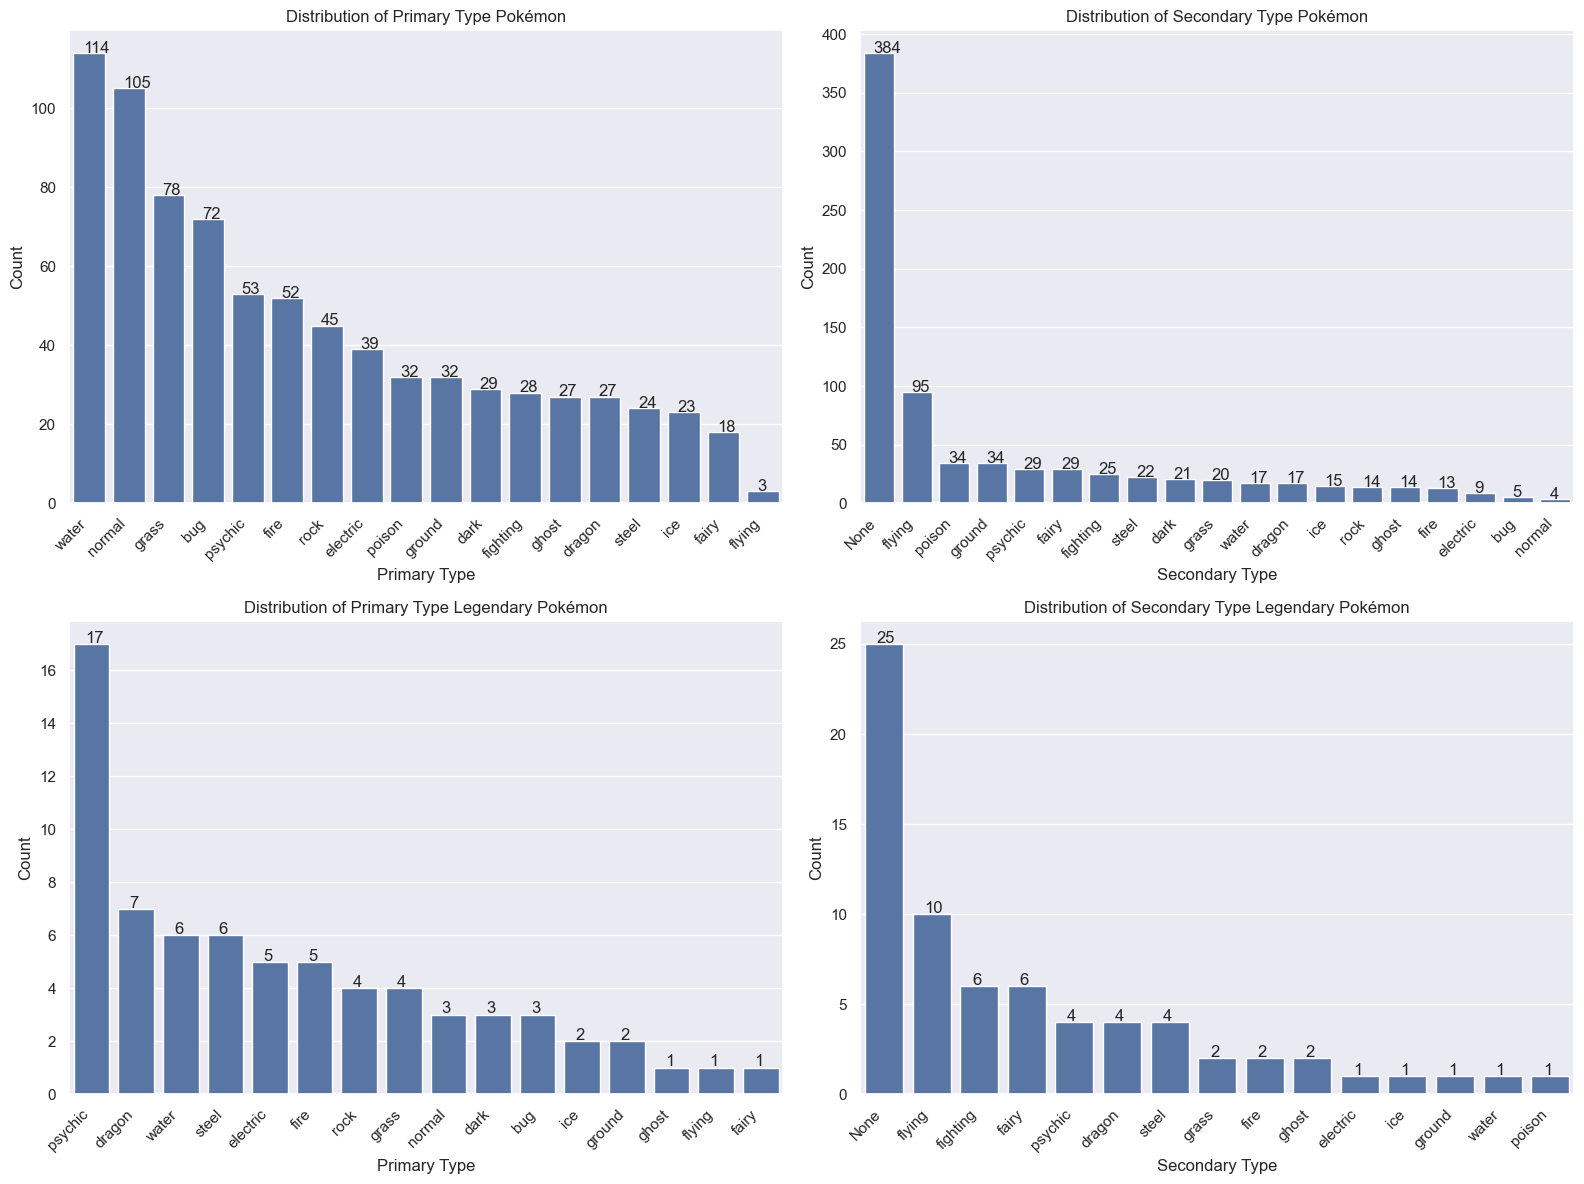

In [38]:
fig, axes = plt.subplots(2, 2, figsize = (16, 12))

# Overall Distribution

distro_type = sns.countplot(x = "type1",
                           data = df,
                           order = df["type1"].value_counts().index,
                           ax = axes[0, 0])

axes[0, 0].set_title('Distribution of Primary Type Pokémon')
axes[0, 0].set_xlabel('Primary Type')
axes[0, 0].set_ylabel('Count')
plt.setp(axes[0, 0].get_xticklabels(), rotation = 45, ha = "right") # enhanced readability

for p in distro_type.patches:
    distro_type.annotate("{:.0f}".format(p.get_height()),
               (p.get_x() + 0.25,
               p.get_height() + 0.05))
    
distro_type = sns.countplot(x = "type2",
                           data = df,
                           order = df["type2"].value_counts().index,
                           ax = axes[0, 1])

axes[0, 1].set_title('Distribution of Secondary Type Pokémon')
axes[0, 1].set_xlabel('Secondary Type')
axes[0, 1].set_ylabel('Count')
plt.setp(axes[0, 1].get_xticklabels(), rotation = 45, ha = "right")

for p in distro_type.patches:
    distro_type.annotate("{:.0f}".format(p.get_height()),
               (p.get_x() + 0.25,
               p.get_height() + 0.05))  
    
# Legendary Distribution

distro_type = sns.countplot(x = "type1",
                           data = df_legendary,
                           order = df_legendary["type1"].value_counts().index,
                           ax = axes[1, 0])

axes[1, 0].set_title('Distribution of Primary Type Legendary Pokémon')
axes[1, 0].set_xlabel('Primary Type')
axes[1, 0].set_ylabel('Count')
plt.setp(axes[1, 0].get_xticklabels(), rotation = 45, ha = "right")

for p in distro_type.patches:
    distro_type.annotate("{:.0f}".format(p.get_height()),
               (p.get_x() + 0.25,
               p.get_height() + 0.05))
    
distro_type = sns.countplot(x = "type2",
                           data = df_legendary,
                           order = df_legendary["type2"].value_counts().index,
                           ax = axes[1, 1])

axes[1, 1].set_title('Distribution of Secondary Type Legendary Pokémon')
axes[1, 1].set_xlabel('Secondary Type')
axes[1, 1].set_ylabel('Count')
plt.setp(axes[1, 1].get_xticklabels(), rotation = 45, ha = "right")

for p in distro_type.patches:
    distro_type.annotate("{:.0f}".format(p.get_height()),
               (p.get_x() + 0.25,
               p.get_height() + 0.05))

plt.tight_layout()
plt.show()

In [39]:
# Weight and Height examination:

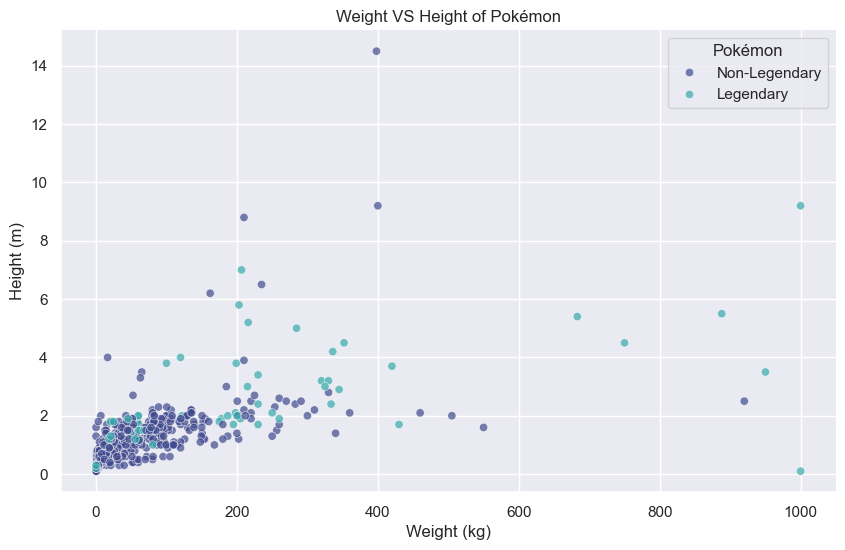

In [40]:
sns.set(rc = {"figure.figsize": (10, 6)})

scatter = sns.scatterplot(data = df,
                           x = "weight_kg",
                           y = "height_m",
                           hue = "is_legendary", # this argument is responsible for the distinction whether a pkmn is a lgnd or not.
                           palette = "mako",
                           alpha = 0.7)

# plt.legend(title = "Pokémon distinction", labels = ["Legendary", "Non-legendary"], palette = "mako")
scatter.set_title("Weight VS Height of Pokémon")
scatter.set_xlabel("Weight (kg)")
scatter.set_ylabel("Height (m)")

# Custom legend settings
legend_labels = {"0": "Non-Legendary", "1" : "Legendary"}
handles, labels = scatter.get_legend_handles_labels()
labels = [legend_labels[label] for label in labels]
scatter.legend(handles = handles, labels = labels, title = "Pokémon")

sns.despine()

In [41]:
# Investigate base happiness of Pokémon:

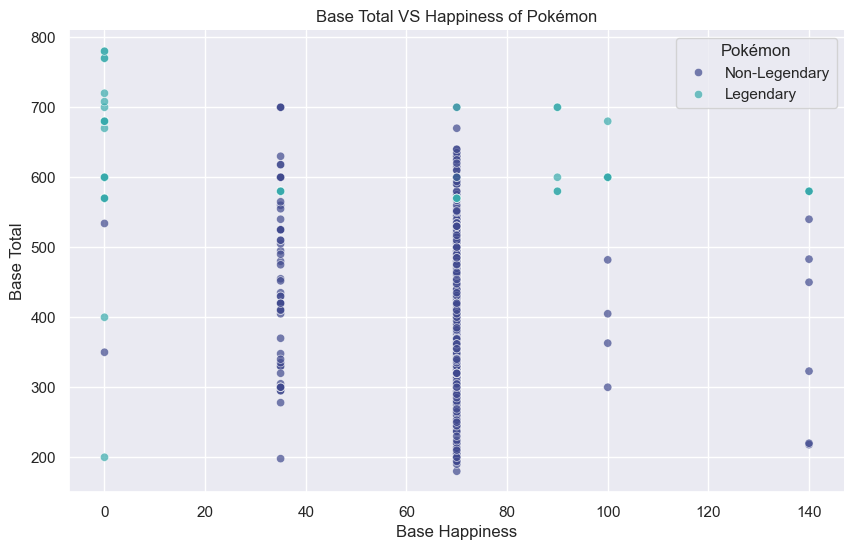

In [42]:
sns.set(rc = {"figure.figsize": (10, 6)})

scatter = sns.scatterplot(data = df,
                           x = "base_happiness",
                           y = "base_total",
                           hue = "is_legendary", # this argument is responsible for the distinction whether a pkmn is a lgnd or not.
                           palette = "mako",
                           alpha = 0.7)

# plt.legend(title = "Pokémon distinction", labels = ["Legendary", "Non-legendary"], palette = "mako")
scatter.set_title("Base Total VS Happiness of Pokémon")
scatter.set_xlabel("Base Happiness")
scatter.set_ylabel("Base Total")

# Custom legend settings
legend_labels = {"0": "Non-Legendary", "1" : "Legendary"}
handles, labels = scatter.get_legend_handles_labels()
labels = [legend_labels[label] for label in labels]
scatter.legend(handles = handles, labels = labels, title = "Pokémon")

sns.despine()

In [43]:
# Investigate base total evolvement as well as another stat contributing to base total:

In [44]:
df_evolution_line = df[["name", "attack", "base_total"]]

df_evolution_line

,name,attack,base_total
0,Bulbasaur,49,318
1,Ivysaur,62,405
2,Venusaur,100,625
3,Charmander,52,309
4,Charmeleon,64,405
...,...,...,...
796,Celesteela,101,570
797,Kartana,181,570
798,Guzzlord,101,570
799,Necrozma,107,600


In [45]:
df_f = df_evolution_line.iloc[:3]
df_f

,name,attack,base_total
0,Bulbasaur,49,318
1,Ivysaur,62,405
2,Venusaur,100,625


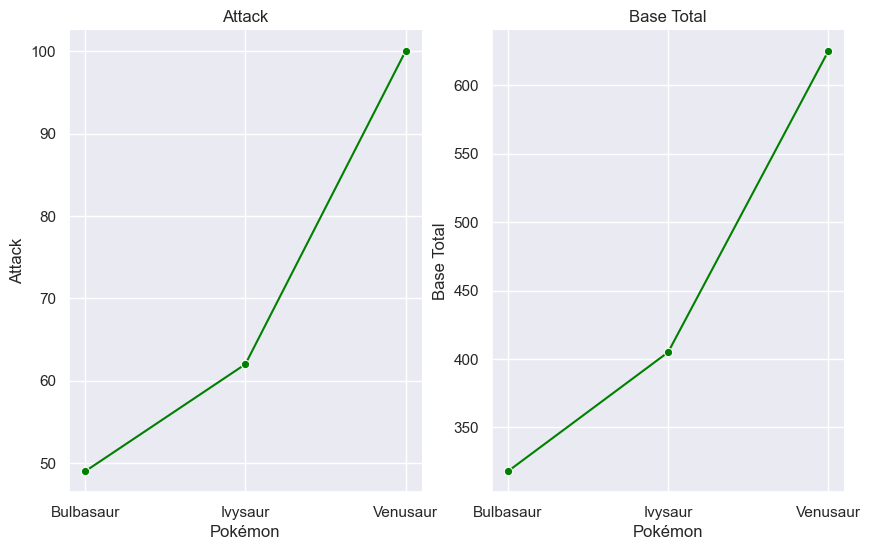

In [46]:
# Create a plot
sns.set(rc = {"figure.figsize": (10, 6)})

# Plot "attack" feature
plt.subplot(1, 2, 1)

line = sns.lineplot(data = df_f,
            x = "name",
            y = "attack",
            marker = "o",
            color = "green")

line.set_title("Attack")
line.set_xlabel("Pokémon")
line.set_ylabel("Attack")

# Plot "base_total" feature
plt.subplot(1, 2, 2)

line_2 = sns.lineplot(data = df_f,
            x = "name",
            y = "base_total",
            marker = "o",
            color = "green")

line_2.set_title("Base Total")
line_2.set_xlabel("Pokémon")
line_2.set_ylabel("Base Total")

sns.despine()

In [47]:
# It seems stats increasing as Pokémon evolve.

In [48]:
# Examine the strongest Pokémon overall based on base_total:

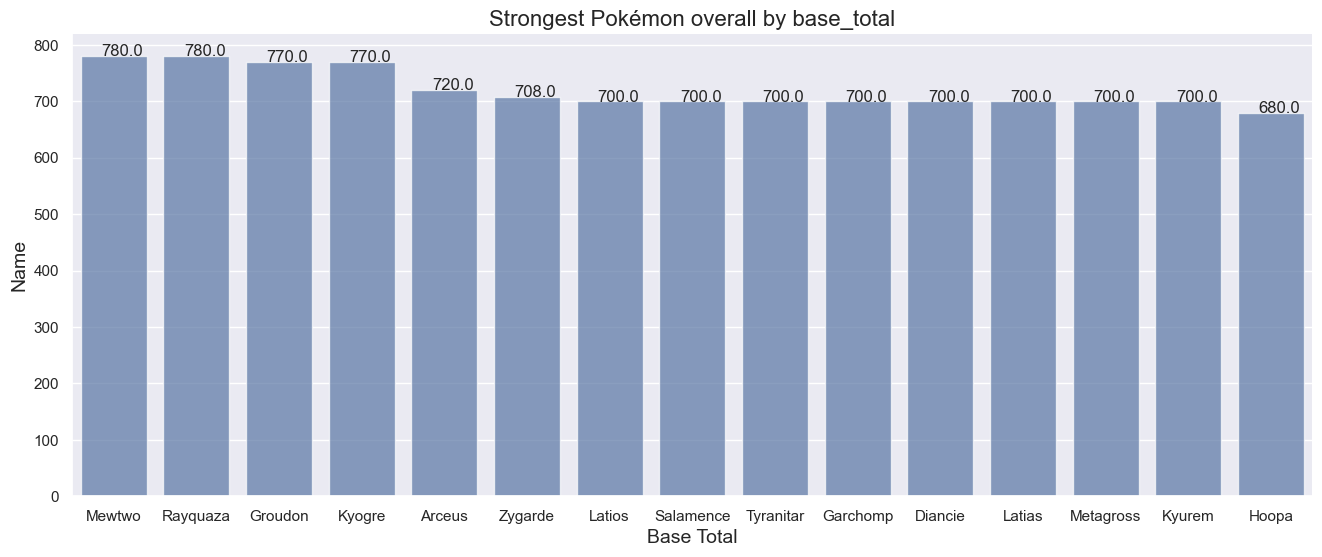

In [49]:
# Define Top 15 strongest Pokémon
top_15_base_total = df.sort_values(by = "base_total", ascending = False).reset_index()[:15]

# Create plot
sns.set(rc = {"figure.figsize": (16, 6)})

ax = sns.barplot(data = top_15_base_total,
                           x = "name",
                           y = "base_total",
                           alpha = 0.7)

ax.set_title("Strongest Pokémon overall by base_total", size = 16)
ax.set_xlabel("Base Total", size = 14)
ax.set_ylabel("Name", size = 14)

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),
               (p.get_x() + 0.25,
               p.get_height() + 0.05))
    
sns.despine()

In [50]:
# CLASSIFIER START

In [51]:
from sklearn.model_selection import train_test_split

# Define variables
X = df[["attack", "defense", "base_total", "hp", "experience_growth", "sp_attack", "sp_defense", "speed",
       "is_legendary"]].values
y = df["is_legendary"].values # target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,shuffle = True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((640, 9), (161, 9), (640,), (161,))

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [53]:
Gnb = GaussianNB()
Gnb.fit(X_train, y_train)

y_pred_Gnb = Gnb.predict(X_test)
score_plain = accuracy_score(y_pred_Gnb, y_test)
score_Gnb = round(accuracy_score(y_pred_Gnb, y_test) * 100, 2)
print(score_plain) # plain score
print("The accuracy score the model achieved is: " + str(score_Gnb) + " %")

0.968944099378882
The accuracy score the model achieved is: 96.89 %


In [54]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

log.fit(X_train, y_train)

y_pred_log = log.predict(X_test)

y_pred_log

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [55]:
score_log = round(accuracy_score(y_pred_log, y_test) * 100, 2)
print("The accuracy score the model achieved is: " + str(score_log) + " %")

The accuracy score the model achieved is: 86.34 %


In [56]:
from sklearn.metrics import precision_score, recall_score

precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)

precision_log
recall_log

0.0

In [57]:
# KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

y_pred_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [59]:
score_knn = round(accuracy_score(y_pred_knn, y_test) * 100, 2)
print("The accuracy score the model achieved is: " + str(score_knn) + " %")

The accuracy score the model achieved is: 96.27 %


In [60]:
# Tune parameter

knn_tune = KNeighborsClassifier(n_neighbors = 10)
knn_tune.fit(X_train, y_train)
y_pred_knn_tune = knn_tune.predict(X_test)

score_knn_tune = round(accuracy_score(y_pred_knn_tune, y_test) * 100, 2)
print("The accuracy score the model achieved is: " + str(score_knn_tune) + " %")

The accuracy score the model achieved is: 96.89 %


In [61]:
# Tune parameter

knn_tune_ = KNeighborsClassifier(n_neighbors = 5)
knn_tune_.fit(X_train, y_train)
y_pred_knn_tune_ = knn_tune_.predict(X_test)

score_knn_tune_ = round(accuracy_score(y_pred_knn_tune_, y_test) * 100, 2)
print("The accuracy score the model achieved is: " + str(score_knn_tune_) + " %")

The accuracy score the model achieved is: 96.89 %


In [62]:
# TODO: Plot results of tuned parameters for KNN.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               801 non-null    object 
 1   abilities          801 non-null    object 
 2   attack             801 non-null    int64  
 3   base_egg_steps     801 non-null    int64  
 4   base_happiness     801 non-null    int64  
 5   base_total         801 non-null    int64  
 6   capture_rate       801 non-null    int64  
 7   classification     801 non-null    object 
 8   defense            801 non-null    int64  
 9   experience_growth  801 non-null    int64  
 10  height_m           801 non-null    float64
 11  hp                 801 non-null    int64  
 12  percentage_male    801 non-null    object 
 13  sp_attack          801 non-null    int64  
 14  sp_defense         801 non-null    int64  
 15  speed              801 non-null    int64  
 16  type1              801 non

In [64]:
# Testing different models:

In [65]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df.drop("is_legendary", axis = 1)
y = df["is_legendary"]


numerical_features = X.select_dtypes(include = ["int64", "float64"]).columns
categorical_features = ["type1", "type2"] # one-hot-encoding

preprocesser = ColumnTransformer(transformers =
                                [("num", StandardScaler(), numerical_features),
                                ("cat", OneHotEncoder(), categorical_features)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)